# Analying 911 Calls

In this notebook, I am analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

**Check the data.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


**Figure out the top 5 zip codes for 911 calls.**

In [5]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Figure out the top 5 townships for 911 calls.**

In [6]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Figure out how many unique title codes are there.**

In [7]:
df['title'].nunique()

110

**Split out title column into a Reason column with common reasons for 911 calls.**

In [8]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**Figure out the most common Reason for a 911 call based off of the new columns, and plot.**

In [9]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

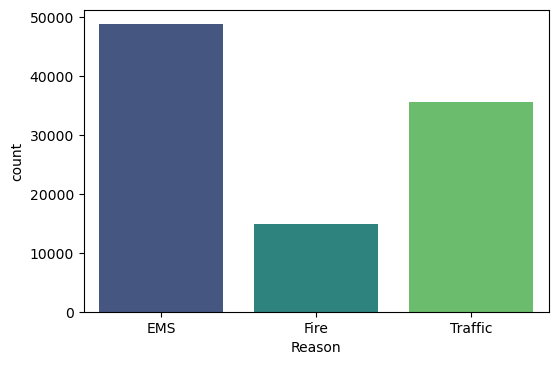

In [10]:
fig = plt.figure(figsize=(6,4), dpi=100)
sns.countplot(data=df, x='Reason', palette='viridis')

**Convert the objects in the timeStamp column to be easily processable.**

In [11]:
type(df['timeStamp'].iloc[0])

str

In [12]:
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))
time = df['timeStamp'].iloc[0]
time.hour

17

**Create 3 new columns called Hour, Month, and Day of Week, based off the timeStamp column.**

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day_Of_Week'] = df['timeStamp'].apply(lambda x: x.day_of_week)

**Use a .map() with this dictionary to map the actual string names to the day of the week.**

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
df['Day_Of_Week'] = df['Day_Of_Week'].map(dmap)

**Create a countplot of the Day of Week & Month column with the hue based off of the Reason column.**

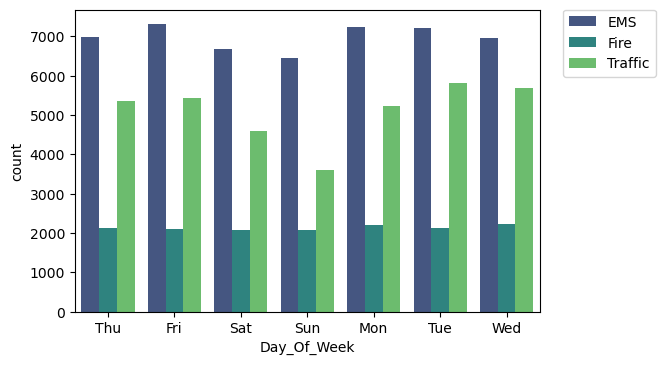

In [16]:
fig = plt.figure(figsize=(6,4), dpi=100)
sns.countplot(data=df, x='Day_Of_Week', hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

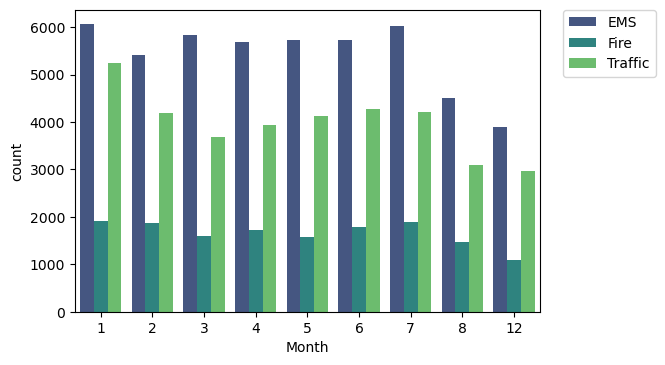

In [17]:
fig = plt.figure(figsize=(6,4), dpi=100)
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Fix missing months Sep, Oct, Nov. See if we can maybe fill in this information by creating a linear fit onn the numbers of calls per month.**

In [18]:
byMonth = df.groupby('Month')
df1 = byMonth.count()
df1.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_Of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101


<AxesSubplot:xlabel='Month', ylabel='lat'>

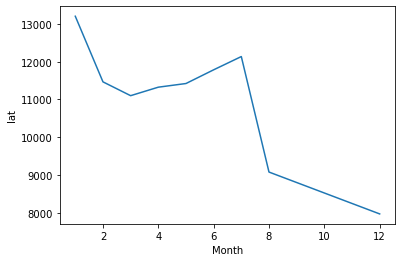

In [19]:
sns.lineplot(data=df1, x=df1.index, y='lat')

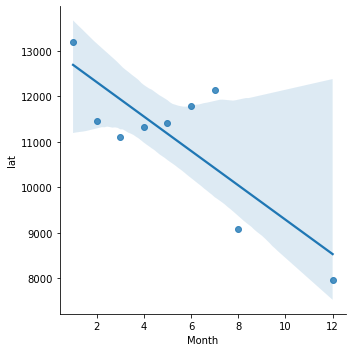

In [20]:
df1.reset_index(inplace=True)
sns.lmplot(data=df1, x='Month', y='lat')

**Plot reasons for 911 calls with date.**

In [21]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

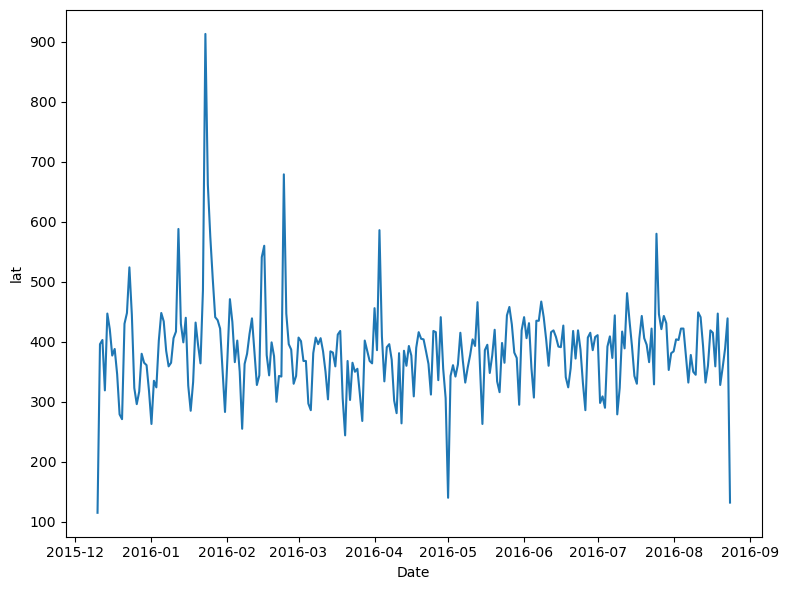

In [22]:
byDate = df.groupby('Date')
df2 = byDate.count()
fig = plt.figure(figsize=(8,6), dpi=100)
sns.lineplot(data=df2, x=df2.index, y='lat')
plt.tight_layout()

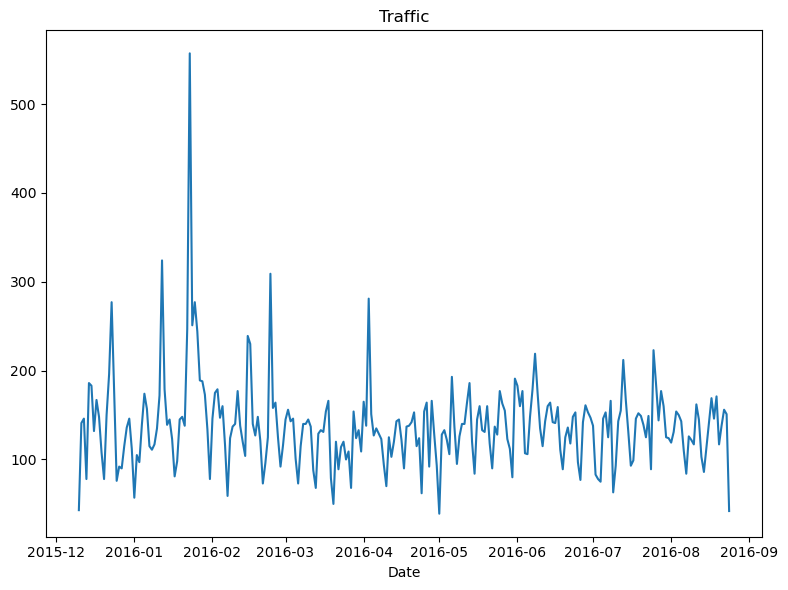

In [23]:
fig = plt.figure(figsize=(8,6), dpi=100)
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

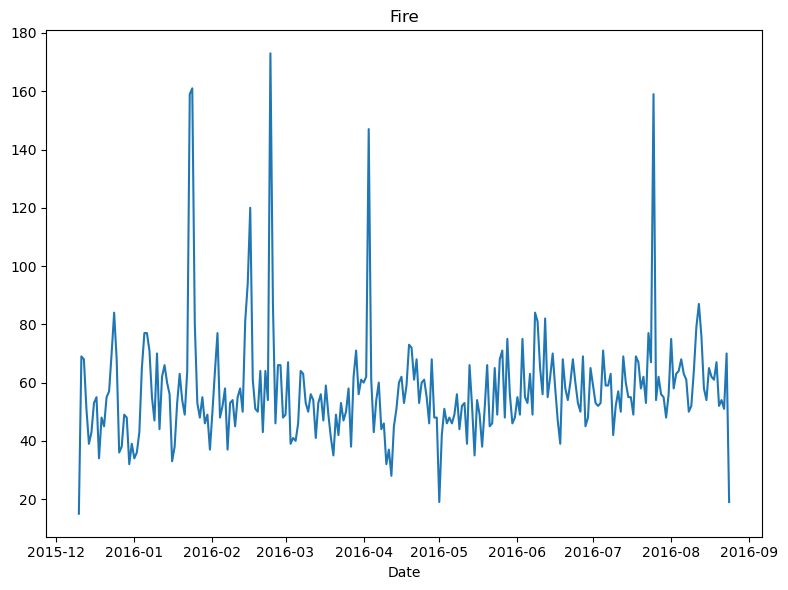

In [24]:
fig = plt.figure(figsize=(8,6), dpi=100)
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

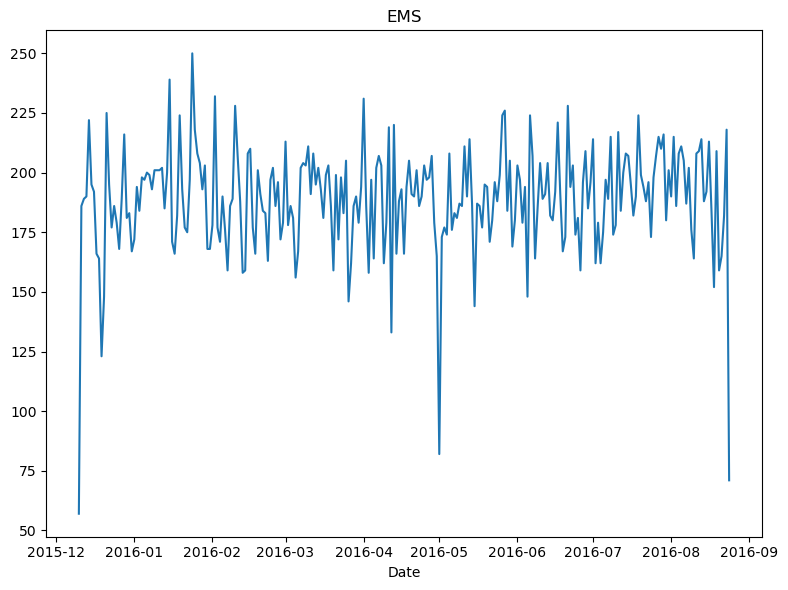

In [25]:
fig = plt.figure(figsize=(8,6), dpi=100)
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

**Create some heatmaps. First, restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [26]:
dayHour = df.groupby(by=['Day_Of_Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_Of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day_Of_Week'>

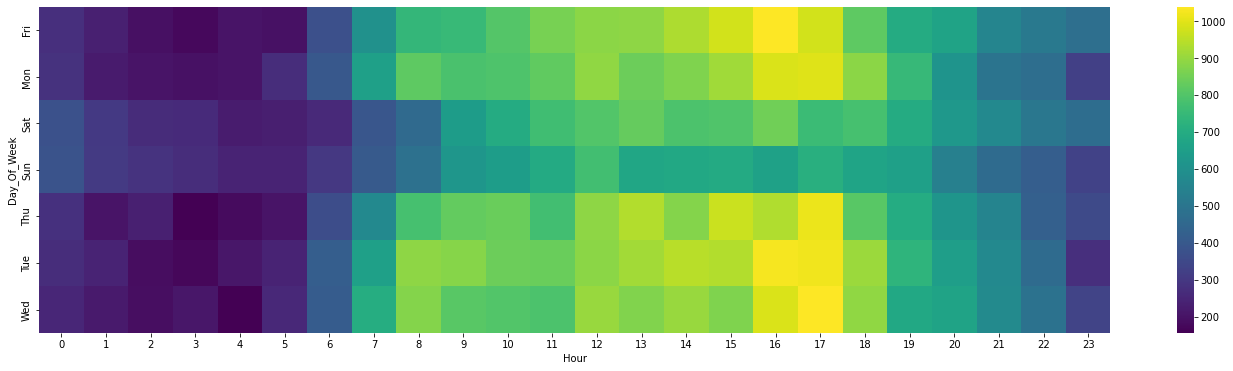

In [27]:
plt.figure(figsize=(24,6))
sns.heatmap(dayHour, cmap='viridis')

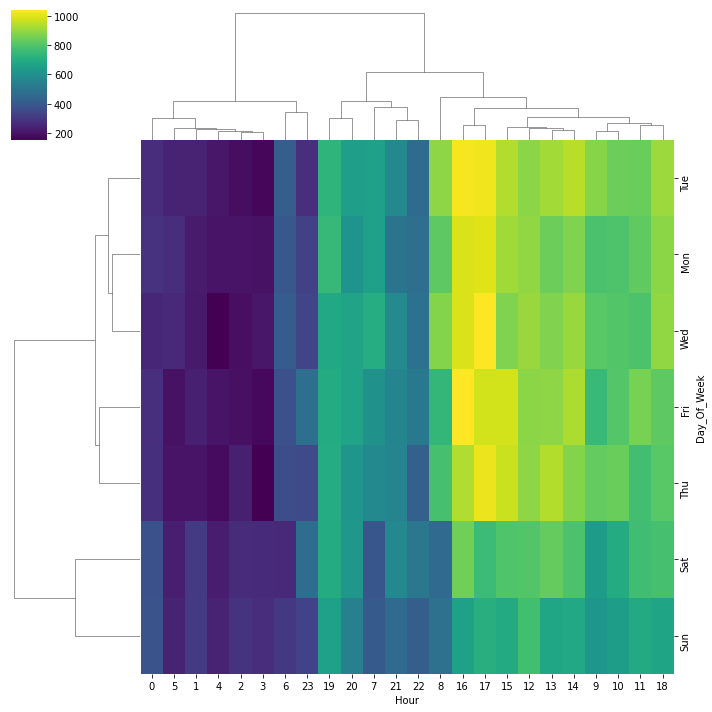

In [28]:
sns.clustermap(dayHour, cmap='viridis')

In [29]:
monthHour = df.groupby(by=['Day_Of_Week','Month']).count()['Reason'].unstack()
monthHour.head()

Month,1,2,3,4,5,6,7,8,12
Day_Of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day_Of_Week'>

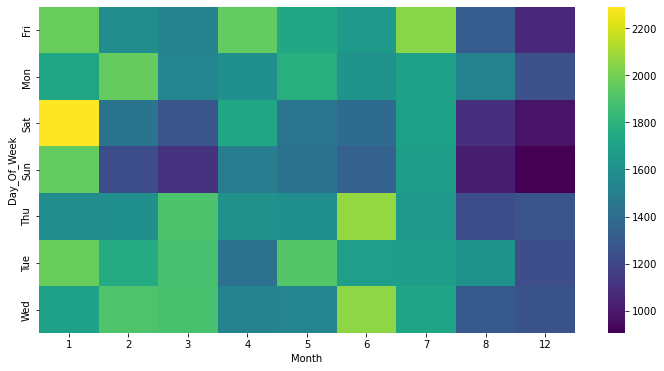

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(monthHour, cmap='viridis')

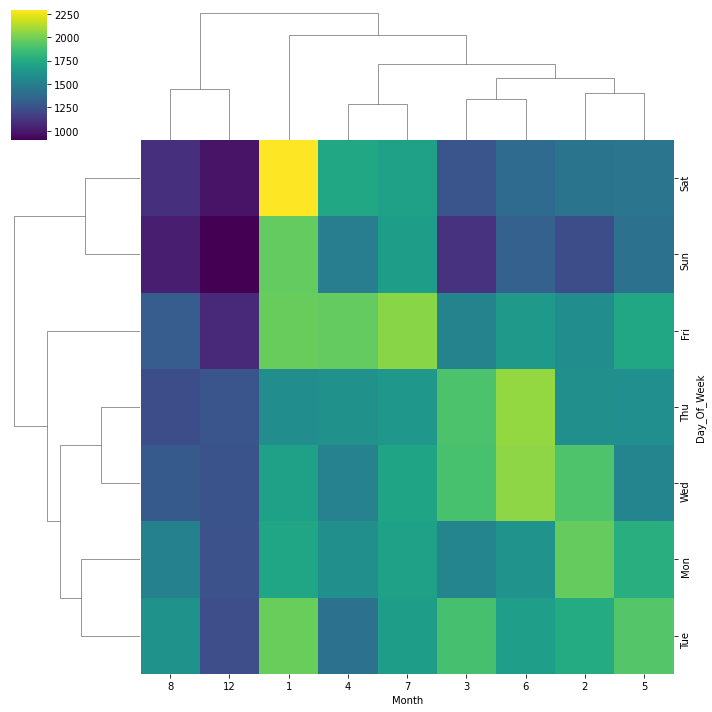

In [31]:
sns.clustermap(monthHour, cmap='viridis')